##### Aprendizaje para determinar Estrellas

#### Ocupado el Notebook Regresión logistica 2b

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("../datos/SDSS-DR14.csv")
df2.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Podemos determinar que gran cantidad de datos forman parte de un formato numérico, por lo que no presentará problemas en la comparación y representación de los mismos.

In [4]:
df2.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Logramos ver ademas que basado en al dataset en su complejidad, no nos daría inconsistencias en cuanto al exceso de ruido que ésto pueda generar.

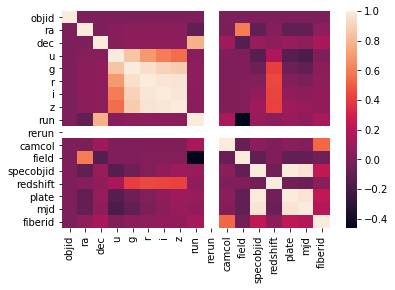

In [5]:
sb.heatmap(df2.corr())
df2_data = df2

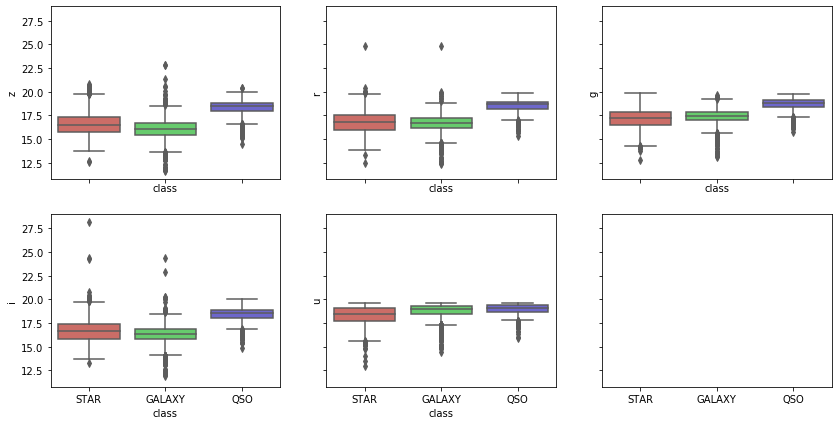

In [6]:
fig, axes = plt.subplots(2, 3,figsize=(14,7), sharex=True, sharey=True)
sb.boxplot(palette='hls', data=df2_data,x="class", y='z',ax=axes[0,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='r',ax=axes[0,1])
sb.boxplot(palette='hls', data=df2_data,x="class", y='g',ax=axes[0,2])
sb.boxplot(palette='hls', data=df2_data,x="class", y='i',ax=axes[1,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='u',ax=axes[1,1])

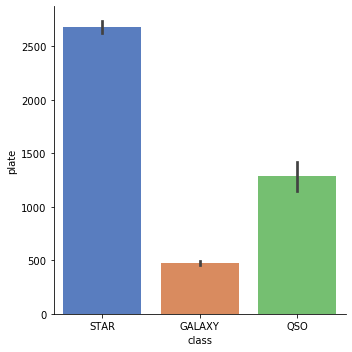

In [7]:
sb.catplot(palette='muted', kind='bar',data=df2_data,x="class", y='plate')

### Transformación de clases a variables numéricas

Elimino todos los datos que están relacionados con estrellas, además de los parámetros de luz z,r,i cuales conforman disparidad en las medias de lo que queremos buscar que es para saber si es QUASAR o GALAXIA

In [8]:
df2_data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [9]:
df2_class = df2_data[['class']]
df2_dum = pd.get_dummies(df2_class)

In [10]:
df2_dum.head()

,class_GALAXY,class_QSO,class_STAR
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [11]:
df2_galaxy= df2_dum.drop(['class_QSO','class_STAR'],axis=1)

In [12]:
df2_full = df2_data.drop(['class'],axis=1)
df2_data = pd.concat([df2_galaxy,df2_full],axis=1)

In [13]:
df2_data.head()

,class_GALAXY,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,0,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,1,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,0,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,0,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512


###  Revision del dataset

In [14]:
df2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
class_GALAXY    10000 non-null uint8
objid           10000 non-null float64
ra              10000 non-null float64
dec             10000 non-null float64
u               10000 non-null float64
g               10000 non-null float64
r               10000 non-null float64
i               10000 non-null float64
z               10000 non-null float64
run             10000 non-null int64
rerun           10000 non-null int64
camcol          10000 non-null int64
field           10000 non-null int64
specobjid       10000 non-null float64
redshift        10000 non-null float64
plate           10000 non-null int64
mjd             10000 non-null int64
fiberid         10000 non-null int64
dtypes: float64(10), int64(7), uint8(1)
memory usage: 1.3 MB


In [15]:
df2_data.isnull().sum()

class_GALAXY    0
objid           0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
run             0
rerun           0
camcol          0
field           0
specobjid       0
redshift        0
plate           0
mjd             0
fiberid         0
dtype: int64

In [16]:
df2_data.shape

(10000, 18)

### Proceso de entrenamiento y clasificación

In [17]:
X = df2_data.ix[:,1:df2_data.shape[1]].values
y = df2_data.ix[:,0].values

In [18]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [19]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [20]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [21]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [22]:
import time
start_time = time.time()

num_iter = 1000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    print(theta)

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

[-2.00000000e-05 -2.47530000e+13  8.66325209e-02  4.60958905e-02
  8.87307120e-03 -1.43280165e-03 -9.90586725e-03 -1.58659259e-02
 -2.05658751e-02  7.63910000e-01 -6.02000000e-03  2.25000000e-04
 -7.68450000e-02 -5.53661299e+16 -3.17162880e-03 -4.91748400e+01
 -4.67032250e+01 -6.54830000e-01]
[ 4.99600000e-02  6.18329940e+16  8.94976437e+00  8.33999180e-01
  9.48713910e-01  8.65730971e-01  8.22236431e-01  7.97447111e-01
  7.80009908e-01  5.05795600e+01  1.50379600e+01  1.82885000e-01
  1.49653150e+01 -2.84811813e+16  8.43027986e-04 -2.53003600e+01
  2.55377022e+03  1.63438100e+01]
[ 3.15800000e-02  3.90849870e+16  5.71353837e+00  5.86061265e-01
  6.07943741e-01  5.39103152e-01  5.00184280e-01  4.77252184e-01
  4.60731515e-01  3.25217200e+01  9.50558000e+00  1.13875000e-01
  9.11108500e+00 -3.45620111e+16 -6.70676568e-03 -3.06997300e+01
  1.60013488e+03  1.02392200e+01]
[ 1.55400000e-02  1.92330810e+16  2.73100754e+00  3.95274689e-01
  3.09441454e-01  2.51563196e-01  2.16077312e-01  1.9

  2.53208819e+03  2.60146500e+01]
[ 3.48200000e-02  4.30949730e+16  1.15305238e+00  1.02303286e+01
  8.19965577e-01  3.63154615e-01  6.55567058e-02 -1.18125058e-01
 -2.54473173e-01  1.26185230e+02  1.04808200e+01  2.52135000e-01
 -6.88581500e+00 -7.45619808e+16 -1.83852358e-01 -6.62293500e+01
  1.70809942e+03  2.06206200e+01]
[ 1.98000000e-02  2.45054700e+16 -1.64923012e+00  1.00869180e+01
  5.40450568e-01  9.34277348e-02 -2.01178332e-01 -3.83628052e-01
 -5.19389756e-01  1.12052440e+02  5.95980000e+00  1.95985000e-01
 -1.18545550e+01 -7.42750338e+16 -1.91248653e-01 -6.59732800e+01
  9.33330485e+02  1.56689100e+01]
[ 2.64200000e-02  3.26987130e+16 -1.06386508e+00  1.07883391e+01
  6.67018688e-01  2.02677035e-01 -1.01511535e-01 -2.89425385e-01
 -4.29109430e-01  1.24247580e+02  7.95242000e+00  2.28675000e-01
 -1.10036650e+01 -6.21698780e+16 -1.94431241e-01 -5.52223500e+01
  1.28431788e+03  1.81605000e+01]
[ 1.59700000e-02  1.97652705e+16 -2.88603957e+00  1.09175465e+01
  4.73281473e-01  1

[ 3.36700000e-02  4.16716755e+16 -4.64393934e+00  2.37191508e+01
  9.47845072e-01  7.22648797e-02 -5.01955114e-01 -8.56801683e-01
 -1.11951713e+00  2.52702770e+02  1.01346700e+01  4.47655000e-01
 -2.42859850e+01 -9.51772302e+16 -3.81397373e-01 -8.45419000e+01
  1.63091311e+03  3.11021500e+01]
[ 2.81700000e-02  3.48646005e+16 -5.55461664e+00  2.40648675e+01
  8.47246605e-01 -3.00863057e-02 -6.06595501e-01 -9.63106150e-01
 -1.22708348e+00  2.50594460e+02  8.47917000e+00  4.36645000e-01
 -2.58274350e+01 -8.89725222e+16 -3.86669732e-01 -7.90306700e+01
  1.35274858e+03  2.97025300e+01]
[ 3.07900000e-02  3.81072435e+16 -5.43931588e+00  2.47257032e+01
  8.98842065e-01  9.35391805e-03 -5.74323107e-01 -9.35095829e-01
 -1.20208065e+00  2.59041420e+02  9.26779000e+00  4.58415000e-01
 -2.61974150e+01 -7.86629575e+16 -3.90419602e-01 -6.98743200e+01
  1.49605511e+03  3.12721100e+01]
[ 2.03900000e-02  2.52356835e+16 -7.25029596e+00  2.48549379e+01
  7.06067293e-01 -1.79080893e-01 -7.62259216e-01 -1.1

  1.66269549e+03  4.07131100e+01]
[ 3.53200000e-02  4.37137980e+16 -9.74023513e+00  3.62635293e+01
  1.12025899e+00 -1.50641430e-01 -9.85326778e-01 -1.50149919e+00
 -1.88292343e+00  3.70705500e+02  1.06313200e+01  6.37435000e-01
 -4.00167850e+01 -9.79102393e+16 -5.65759830e-01 -8.69718400e+01
  1.70120210e+03  4.16121400e+01]
[ 2.97200000e-02  3.67829580e+16 -1.06669893e+01  3.66027067e+01
  1.01777710e+00 -2.54787366e-01 -1.09178440e+00 -1.60955097e+00
 -1.99222222e+00  3.68462290e+02  8.94572000e+00  6.25845000e-01
 -4.15881850e+01 -9.17605770e+16 -5.71055288e-01 -8.15094900e+01
  1.41784511e+03  4.01699800e+01]
[ 3.03200000e-02  3.75255480e+16 -1.07934610e+01  3.71751628e+01
  1.03149556e+00 -2.50666892e-01 -1.09366115e+00 -1.61506698e+00
 -2.00034554e+00  3.74173680e+02  9.12632000e+00  6.40605000e-01
 -4.21512950e+01 -8.24434297e+16 -5.75147267e-01 -7.32344200e+01
  1.45635172e+03  4.10690100e+01]
[ 2.14900000e-02  2.65970985e+16 -1.23473221e+01  3.73061881e+01
  8.68155807e-01 -4

[ 3.62500000e-02  4.48648125e+16 -1.67458878e+01  5.08848294e+01
  1.30668153e+00 -4.11889945e-01 -1.54383484e+00 -2.24447329e+00
 -2.76242488e+00  5.07496540e+02  1.09112500e+01  8.35895000e-01
 -6.12312350e+01 -1.03308282e+17 -7.74044068e-01 -9.17691900e+01
  1.72594005e+03  5.37167000e+01]
[ 3.08500000e-02  3.81815025e+16 -1.76418197e+01  5.12306101e+01
  1.20797147e+00 -5.12472417e-01 -1.64675066e+00 -2.34907640e+00
 -2.86830633e+00  5.05468660e+02  9.28585000e+00  8.25365000e-01
 -6.27518750e+01 -9.70494822e+16 -7.79311127e-01 -8.62099200e+01
  1.45297118e+03  5.23292200e+01]
[ 3.31300000e-02  4.10033445e+16 -1.75654702e+01  5.18784159e+01
  1.25318915e+00 -4.79016226e-01 -1.62028491e+00 -2.32677976e+00
 -2.84896051e+00  5.13456620e+02  9.97213000e+00  8.46115000e-01
 -6.31391750e+01 -8.69050860e+16 -7.83127973e-01 -7.72002500e+01
  1.57863855e+03  5.38206600e+01]
[ 2.29900000e-02  2.84535735e+16 -1.93235023e+01  5.20079611e+01
  1.06534042e+00 -6.62839144e-01 -1.80376293e+00 -2.5

[ 3.90300000e-02  4.83054795e+16 -2.40115366e+01  6.74610090e+01
  1.56050401e+00 -6.90484077e-01 -2.17550059e+00 -3.09554985e+00
 -3.77556256e+00  6.63928920e+02  1.17480300e+01  1.08662500e+00
 -8.39063950e+01 -1.16521687e+17 -1.01976982e+00 -1.03508860e+02
  1.83084812e+03  6.94585700e+01]
[ 3.52600000e-02  4.36395390e+16 -2.47145519e+01  6.78056367e+01
  1.49234660e+00 -7.62476298e-01 -2.25072089e+00 -3.17298986e+00
 -3.85461916e+00  6.63775350e+02  1.06132600e+01  1.08493500e+00
 -8.52155850e+01 -1.09401004e+17 -1.02462222e+00 -9.71842400e+01
  1.64261347e+03  6.87102400e+01]
[ 3.64900000e-02  4.51618485e+16 -2.47637000e+01  6.84070515e+01
  1.51783281e+00 -7.47372754e-01 -2.24197178e+00 -3.16807436e+00
 -3.85244097e+00  6.70330550e+02  1.09834900e+01  1.10212500e+00
 -8.57015050e+01 -9.97722293e+16 -1.02859843e+00 -8.86324400e+01
  1.71380387e+03  6.98181700e+01]
[ 2.80400000e-02  3.47037060e+16 -2.62453661e+01  6.85546310e+01
  1.36157872e+00 -9.01834758e-01 -2.39709741e+00 -3.3

[ 1.32700000e-02  1.64236155e+16 -3.82612523e+01  8.55617087e+01
  1.25783693e+00 -1.45754211e+00 -3.25546632e+00 -4.37061832e+00
 -5.19512743e+00  8.09900970e+02  3.99427000e+00  1.26465500e+00
 -1.17828525e+02 -4.26649992e+16 -1.25748034e+00 -3.79126900e+01
  5.44505005e+02  7.67446000e+01]
[ 1.73200000e-02  2.14360980e+16 -3.81075360e+01  8.62414503e+01
  1.33615379e+00 -1.39318291e+00 -3.19912836e+00 -4.31898360e+00
 -5.14678029e+00  8.19827980e+02  5.21332000e+00  1.28933500e+00
 -1.17998945e+02 -3.16672525e+16 -1.26100478e+00 -2.81451700e+01
  7.61991415e+02  7.85533900e+01]
[ 2.30000000e-03  2.84659500e+15 -4.09098185e+01  8.60980396e+01
  1.05663878e+00 -1.66290979e+00 -3.46586340e+00 -4.58448660e+00
 -5.41169687e+00  8.05695190e+02  6.92300000e-01  1.23318500e+00
 -1.22967685e+02 -3.13803055e+16 -1.26840108e+00 -2.78891000e+01
 -1.27775150e+01  7.36016800e+01]
[ 5.22800000e-02  6.47043420e+16 -3.20466866e+01  8.68859429e+01
  1.99647962e+00 -7.95746018e-01 -2.63372110e+00 -3.7

[ 2.70000000e-04  3.34165500e+14 -4.75991932e+01  1.01157039e+02
  1.18962974e+00 -1.98525320e+00 -4.09210540e+00 -5.40007655e+00
 -6.36744520e+00  9.46392860e+02  8.12700000e-02  1.44873500e+00
 -1.42227225e+02 -1.38432439e+17 -1.48076351e+00 -1.22973010e+02
 -2.05072205e+02  8.40365400e+01]
[ 5.02500000e-02  6.21919125e+16 -3.87360613e+01  1.01944942e+02
  2.12947058e+00 -1.11808942e+00 -3.25996310e+00 -4.58676351e+00
 -5.56686942e+00  9.96208510e+02  1.51252500e+01  1.63139500e+00
 -1.27185065e+02 -1.11547491e+17 -1.47674885e+00 -9.90985300e+01
  2.39540124e+03  1.01035180e+02]
[ 3.71200000e-02  4.59415680e+16 -4.10920062e+01  1.01904260e+02
  1.88544116e+00 -1.35460804e+00 -3.49450504e+00 -4.82064921e+00
 -5.80052956e+00  9.84627820e+02  1.11731200e+01  1.58418500e+00
 -1.31157305e+02 -1.09947216e+17 -1.48369913e+00 -9.76761800e+01
  1.71975173e+03  9.68601300e+01]
[ 3.33500000e-02  4.12756275e+16 -4.17950215e+01  1.02248888e+02
  1.81728375e+00 -1.42660026e+00 -3.56972534e+00 -4.8

[ 2.58400000e-02  3.19808760e+16 -5.16450190e+01  1.19507341e+02
  1.86597025e+00 -1.89725936e+00 -4.38502874e+00 -5.92725328e+00
 -7.06650789e+00  1.13920637e+03  7.77784000e+00  1.81770500e+00
 -1.58742605e+02 -7.53244560e+16 -1.73799786e+00 -6.69279500e+01
  1.14648403e+03  1.09117150e+02]
[ 2.16700000e-02  2.68198755e+16 -5.23712536e+01  1.19853922e+02
  1.79028149e+00 -1.97629448e+00 -4.46706207e+00 -6.01138165e+00
 -7.15214695e+00  1.13863480e+03  6.52267000e+00  1.81361500e+00
 -1.60116235e+02 -6.84124657e+16 -1.74297032e+00 -6.07886400e+01
  9.37485885e+02  1.08179710e+02]
[ 2.42900000e-02  3.00625185e+16 -5.22559528e+01  1.20514758e+02
  1.84187695e+00 -1.93685426e+00 -4.43478968e+00 -5.98337132e+00
 -7.12714412e+00  1.14708176e+03  7.31129000e+00  1.83538500e+00
 -1.60486215e+02 -5.81029010e+16 -1.74672019e+00 -5.16322900e+01
  1.08079242e+03  1.09749290e+02]
[ 1.38400000e-02  1.71290760e+16 -5.40781273e+01  1.20643965e+02
  1.64813973e+00 -2.12620071e+00 -4.62362439e+00 -6.1

[ 2.96500000e-02  3.66963225e+16 -5.96326969e+01  1.37273441e+02
  2.13196664e+00 -2.18399924e+00 -5.03500458e+00 -6.80159398e+00
 -8.10572839e+00  1.30917698e+03  8.92465000e+00  2.08441500e+00
 -1.82977215e+02 -3.55104151e+16 -1.99583324e+00 -3.15698400e+01
  1.35311205e+03  1.25077960e+02]
[ 1.36400000e-02  1.68815460e+16 -6.26114828e+01  1.37082683e+02
  1.83404327e+00 -2.47099329e+00 -5.31857560e+00 -7.08373475e+00
 -8.38712302e+00  1.29383920e+03  4.10564000e+00  2.02459500e+00
 -1.88311795e+02 -3.61289711e+16 -2.00338292e+00 -3.21179100e+01
  5.26501925e+02  1.19682450e+02]
[ 3.50000000e-03  4.33177500e+15 -6.43695149e+01  1.37212228e+02
  1.64619454e+00 -2.65481621e+00 -5.50205363e+00 -7.26739993e+00
 -8.57115447e+00  1.28622315e+03  1.05350000e+00  1.99098500e+00
 -1.91176575e+02 -3.25242779e+16 -2.00958554e+00 -2.89155900e+01
  6.97070500e+00  1.16780330e+02]
[ 5.34800000e-02  6.61895220e+16 -5.55063830e+01  1.38000131e+02
  2.58603538e+00 -1.78765243e+00 -4.66991133e+00 -6.4

[ 2.01400000e-02  2.49262710e+16 -6.77613675e+01  1.52870102e+02
  2.13654452e+00 -2.67020590e+00 -5.84854992e+00 -7.81874573e+00
 -9.27320784e+00  1.44722954e+03  6.06214000e+00  2.29182500e+00
 -2.05947515e+02 -7.45010392e+16 -2.23260189e+00 -6.62029000e+01
  8.22366245e+02  1.35165610e+02]
[ 2.50400000e-02  3.09907560e+16 -6.75958590e+01  1.53562168e+02
  2.23071054e+00 -2.59106508e+00 -5.77792834e+00 -7.75310200e+00
 -9.21104369e+00  1.45803630e+03  7.53704000e+00  2.31905500e+00
 -2.06071225e+02 -6.31010129e+16 -2.23598340e+00 -5.60781200e+01
  1.08391899e+03  1.37121840e+02]
[ 1.45900000e-02  1.80573135e+16 -6.94180335e+01  1.53691376e+02
  2.03697332e+00 -2.78041153e+00 -5.96676305e+00 -7.94204091e+00
 -9.40029592e+00  1.45001761e+03  4.39159000e+00  2.28363500e+00
 -2.08970965e+02 -5.96811373e+16 -2.24223145e+00 -5.30399400e+01
  5.48216565e+02  1.34174730e+02]
[ 3.10400000e-02  3.84166560e+16 -6.65920390e+01  1.54487222e+02
  2.34773312e+00 -2.49945298e+00 -5.70095489e+00 -7.6

[ 5.35400000e-02  6.62637810e+16 -6.94133117e+01  1.68889091e+02
  2.92214733e+00 -2.39230888e+00 -5.89554992e+00 -8.06423890e+00
 -9.66377363e+00  1.62524828e+03  1.61155400e+01  2.63355500e+00
 -2.17126775e+02 -4.98089258e+15 -2.44728036e+00 -4.46253000e+00
  2.59039966e+03  1.59546210e+02]
[ 3.52000000e-03  4.35652800e+15 -7.81031785e+01  1.68193379e+02
  2.00005264e+00 -3.26233826e+00 -6.74750396e+00 -8.90928379e+00
 -1.05054812e+01  1.57696045e+03  1.05952000e+00  2.45134500e+00
 -2.32322625e+02 -1.42598101e+17 -2.45763828e+00 -1.26686690e+02
 -1.03480235e+02  1.41237910e+02]
[ 5.35000000e-02  6.62142750e+16 -6.92400466e+01  1.68981282e+02
  2.93989348e+00 -2.39517448e+00 -5.91536166e+00 -8.09597075e+00
 -9.70490538e+00  1.62677610e+03  1.61035000e+01  2.63400500e+00
 -2.17280465e+02 -1.15713152e+17 -2.45362362e+00 -1.02812210e+02
  2.49699321e+03  1.58236550e+02]
[ 3.84800000e-02  4.76247720e+16 -7.20423291e+01  1.68837872e+02
  2.66037847e+00 -2.66490136e+00 -6.18209670e+00 -8.3

[ 4.56000000e-03  5.64368400e+15 -8.56173618e+01  1.86058334e+02
  2.19304086e+00 -3.58813157e+00 -7.41188280e+00 -9.78219598e+00
 -1.15309430e+01  1.74400296e+03  1.37256000e+00  2.72829500e+00
 -2.54796745e+02 -3.10263292e+16 -2.70369351e+00 -2.75951900e+01
  3.09406750e+01  1.58323540e+02]
[ 5.45400000e-02  6.75014310e+16 -7.67542300e+01  1.86846238e+02
  3.13288170e+00 -2.72096780e+00 -6.57974050e+00 -8.96888294e+00
 -1.07303672e+01  1.79381861e+03  1.64165400e+01  2.91095500e+00
 -2.39754585e+02 -4.14138062e+15 -2.69967885e+00 -3.72071000e+00
  2.63141412e+03  1.75322180e+02]
[ 4.52000000e-03  5.59417800e+15 -8.54440968e+01  1.86150526e+02
  2.21078700e+00 -3.59099717e+00 -7.43169454e+00 -9.81392783e+00
 -1.15720748e+01  1.74553078e+03  1.36052000e+00  2.72874500e+00
 -2.54950435e+02 -1.41758589e+17 -2.71003677e+00 -1.25944870e+02
 -6.24657750e+01  1.57013880e+02]
[ 5.45000000e-02  6.74519250e+16 -7.65809649e+01  1.86938429e+02
  3.15062784e+00 -2.72383340e+00 -6.59955224e+00 -9.0

[ 2.56600000e-02  3.17580990e+16 -9.09543677e+01  2.03391716e+02
  2.79899789e+00 -3.56852625e+00 -7.77685151e+00 -1.03849621e+01
 -1.23090087e+01  1.92323365e+03  7.72366000e+00  3.03732500e+00
 -2.75343725e+02 -6.54459471e+16 -2.96039039e+00 -5.81709200e+01
  1.05884000e+03  1.78818530e+02]
[ 1.52600000e-02  1.88865390e+16 -9.27653478e+01  2.03520951e+02
  2.60622312e+00 -3.75696106e+00 -7.96478762e+00 -1.05730075e+01
 -1.24973706e+01  1.91525256e+03  4.59326000e+00  3.00215500e+00
 -2.78216635e+02 -6.19957834e+16 -2.96663186e+00 -5.51058400e+01
  5.25738595e+02  1.75876560e+02]
[ 3.03600000e-02  3.75750540e+16 -9.01903863e+01  2.04320066e+02
  2.89164198e+00 -3.49962289e+00 -7.72184650e+00 -1.03380568e+01
 -1.22678295e+01  1.93553050e+03  9.13836000e+00  3.06386500e+00
 -2.73877425e+02 -4.65977846e+16 -2.96855875e+00 -4.14310200e+01
  1.31545245e+03  1.81406410e+02]
[ 1.45900000e-02  1.80573135e+16 -9.31124900e+01  2.04130483e+02
  2.59813472e+00 -3.78248092e+00 -8.00136354e+00 -1.0

[ 7.35000000e-03  9.09672750e+15 -1.01463608e+02  2.19093305e+02
  2.64021188e+00 -4.21407207e+00 -8.74846035e+00 -1.15595385e+01
 -1.36337283e+01  2.05336431e+03  2.21235000e+00  3.20233500e+00
 -3.03206035e+02 -4.72966100e+16 -3.20307145e+00 -4.20531300e+01
  1.08892295e+02  1.87388390e+02]
[ 5.73300000e-02  7.09544745e+16 -9.26004759e+01  2.19881208e+02
  3.58005272e+00 -3.34690830e+00 -7.91631805e+00 -1.07462255e+01
 -1.28331525e+01  2.10317996e+03  1.72563300e+01  3.38499500e+00
 -2.88163875e+02 -2.04116614e+16 -3.19905680e+00 -1.81786500e+01
  2.70936574e+03  2.04387030e+02]
[ 1.50600000e-02  1.86390090e+16 -9.99842865e+01  2.19341983e+02
  2.80251152e+00 -4.07970477e+00 -8.63355377e+00 -1.14574419e+01
 -1.35416406e+01  2.06318862e+03  4.53306000e+00  3.23472500e+00
 -3.01346425e+02 -1.04618305e+17 -3.20725492e+00 -9.29657500e+01
  4.51757295e+02  1.90379320e+02]
[ 6.50400000e-02  8.04967560e+16 -9.11211547e+01  2.20129886e+02
  3.74235236e+00 -3.21254100e+00 -7.80141147e+00 -1.0

[ 1.81100000e-02  2.24138415e+16 -1.07127014e+02  2.34063851e+02
  3.05345404e+00 -4.36215692e+00 -9.26803205e+00 -1.23090412e+01
 -1.45540119e+01  2.20591565e+03  5.45111000e+00  3.41650500e+00
 -3.23655345e+02 -6.66713143e+16 -3.45593943e+00 -5.92655600e+01
  6.10145955e+02  2.04888140e+02]
[ 2.30100000e-02  2.84783265e+16 -1.06961506e+02  2.34755918e+02
  3.14762005e+00 -4.28301610e+00 -9.19741047e+00 -1.22433975e+01
 -1.44918477e+01  2.21672241e+03  6.92601000e+00  3.44373500e+00
 -3.23779055e+02 -5.52712880e+16 -3.45932095e+00 -4.91407800e+01
  8.71698695e+02  2.06844370e+02]
[ 1.25600000e-02  1.55448840e+16 -1.08783680e+02  2.34885125e+02
  2.95388283e+00 -4.47236256e+00 -9.38624518e+00 -1.24323364e+01
 -1.46811000e+01  2.20870372e+03  3.78056000e+00  3.40831500e+00
 -3.26678795e+02 -5.18514124e+16 -3.46556900e+00 -4.61026000e+01
  3.35996275e+02  2.03897260e+02]
[ 3.09700000e-02  3.83300205e+16 -1.05603928e+02  2.35676481e+02
  3.30113610e+00 -4.15724916e+00 -9.08732232e+00 -1.2

[ 1.52500000e-02  1.88741625e+16 -1.16831795e+02  2.53735226e+02
  3.20361056e+00 -4.79266863e+00 -1.00812277e+01 -1.33590435e+01
 -1.57777061e+01  2.38682967e+03  4.59025000e+00  3.69680500e+00
 -3.51202145e+02 -3.59093632e+16 -3.73218163e+00 -3.19471400e+01
  4.72830465e+02  2.20121630e+02]
[ 4.80000000e-03  5.94072000e+15 -1.18653970e+02  2.53864433e+02
  3.00987334e+00 -4.98201508e+00 -1.02700624e+01 -1.35479824e+01
 -1.59669583e+01  2.37881098e+03  1.44480000e+00  3.66138500e+00
 -3.54101885e+02 -3.24894876e+16 -3.73842968e+00 -2.89089600e+01
 -6.28719550e+01  2.17174520e+02]
[ 5.47800000e-02  6.77984670e+16 -1.09790838e+02  2.54652336e+02
  3.94971418e+00 -4.11485131e+00 -9.43792008e+00 -1.27346694e+01
 -1.51663825e+01  2.42862663e+03  1.64887800e+01  3.84404500e+00
 -3.39059725e+02 -5.60453903e+15 -3.73441502e+00 -5.03448000e+00
  2.53760149e+03  2.34173160e+02]
[ 4.76000000e-03  5.89121400e+15 -1.18480705e+02  2.53956625e+02
  3.02761949e+00 -4.98488068e+00 -1.02898741e+01 -1.3

[ 1.70700000e-02  2.11266855e+16 -1.24598340e+02  2.72490912e+02
  3.45049544e+00 -5.11275333e+00 -1.07774928e+01 -1.42892704e+01
 -1.68808379e+01  2.56220458e+03  5.13807000e+00  3.98332500e+00
 -3.74380265e+02 -6.74983022e+16 -3.99440934e+00 -6.00078300e+01
  5.22784885e+02  2.36972290e+02]
[ 2.86500000e-02  3.54586725e+16 -1.22780872e+02  2.73294032e+02
  3.67002943e+00 -4.91678707e+00 -1.05939549e+01 -1.41127159e+01
 -1.67090376e+01  2.57910177e+03  8.62365000e+00  4.03181500e+00
 -3.71482135e+02 -5.34476557e+16 -3.99686783e+00 -4.75293900e+01
  1.13020025e+03  2.41236280e+02]
[ 1.36300000e-02  1.68691695e+16 -1.25583155e+02  2.73150621e+02
  3.39051442e+00 -5.18651395e+00 -1.08606899e+01 -1.43782188e+01
 -1.69739541e+01  2.56496898e+03  4.10263000e+00  3.97566500e+00
 -3.76450875e+02 -5.31607087e+16 -4.00426413e+00 -4.72733200e+01
  3.55431315e+02  2.36284570e+02]
[ 2.19400000e-02  2.71540410e+16 -1.24565395e+02  2.73952697e+02
  3.54883886e+00 -5.04757458e+00 -1.07322647e+01 -1.4

[ 5.54200000e-02  6.85905630e+16 -1.26033262e+02  2.90089610e+02
  4.36804900e+00 -4.80195031e+00 -1.08566864e+01 -1.46069123e+01
 -1.73737932e+01  2.75827365e+03  1.66814200e+01  4.32593500e+00
 -3.88655815e+02 -1.00919400e+16 -4.25174735e+00 -9.02693000e+00
  2.52397376e+03  2.62473350e+02]
[ 5.63000000e-03  6.96796950e+15 -1.34690771e+02  2.89405711e+02
  3.45020160e+00 -5.66792379e+00 -1.17046483e+01 -1.54479893e+01
 -1.82115489e+01  2.71029528e+03  1.69463000e+00  4.14466500e+00
 -4.03806265e+02 -1.45582202e+17 -4.26207949e+00 -1.29362010e+02
 -1.56743785e+02  2.44278660e+02]
[ 5.56100000e-02  6.88257165e+16 -1.25827639e+02  2.90193615e+02
  4.39004244e+00 -4.80076002e+00 -1.08725060e+01 -1.46346762e+01
 -1.74109731e+01  2.76011093e+03  1.67386100e+01  4.32732500e+00
 -3.88764105e+02 -1.18697253e+17 -4.25806484e+00 -1.05487530e+02
  2.44372966e+03  2.61277300e+02]
[ 4.05900000e-02  5.02362135e+16 -1.28629922e+02  2.90050204e+02
  4.11052743e+00 -5.07048690e+00 -1.11392410e+01 -1.4

In [23]:
result = sigmoid(X, theta)

In [24]:
print(result)

[0. 1. 1. ... 0. 1. 1.]


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y, result)
print(confusion_matrix)
print(classification_report(y, result))

[[3584 1418]
 [1001 3997]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5002
           1       0.74      0.80      0.77      4998

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



## Usando algoritmo de aprendizaje a través de Scikit-Learn en la obtención de resultados

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25)
print(X_test)

[[1.00000000e+00 1.23765000e+18 1.73573276e+02 ... 2.82000000e+02
  5.16580000e+04 2.38000000e+02]
 [1.00000000e+00 1.23765000e+18 1.67449438e+02 ... 2.78000000e+02
  5.19000000e+04 1.67000000e+02]
 [1.00000000e+00 1.23765000e+18 1.43997534e+01 ... 4.21000000e+02
  5.18210000e+04 2.66000000e+02]
 ...
 [1.00000000e+00 1.23765000e+18 2.19123630e+02 ... 3.07000000e+02
  5.16630000e+04 2.53000000e+02]
 [1.00000000e+00 1.23765000e+18 1.71467068e+02 ... 2.81000000e+02
  5.16140000e+04 2.58000000e+02]
 [1.00000000e+00 1.23765000e+18 1.71231501e+02 ... 3.83900000e+03
  5.55750000e+04 7.48000000e+02]]


In [28]:
#Aprendizaje
LogReg = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=uint8)

In [30]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1129,  163],
       [  66, 1142]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      1292
           1       0.88      0.95      0.91      1208

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500

